In [54]:
# Install the datasets library
!pip install datasets
from datasets import load_dataset

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import pandas as pd

Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.

In [56]:
# Load the emotion dataset which contains the twitter dataset labelled as emotions.
dataset = load_dataset("dair-ai/emotion","split", trust_remote_code=True)

# Display the dataset structure
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [57]:
# Convert to pandas DataFrame
df_train = dataset['train'].to_pandas()
df_valid = dataset['validation'].to_pandas()
df_test = dataset['test'].to_pandas()

In [58]:
# Display basic information
print(df_train.info())

# Display the first few rows of the training set
print(df_train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [59]:
# Display unique values in the 'label' column
print("Unique labels in training set:")
print(df_train['label'].unique())

Unique labels in training set:
[0 3 2 5 4 1]


In [60]:
# Define the label-to-emotion mapping based on the dataset's documentation
emotion_labels = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Map numeric labels to emotion labels
df_train['emotion'] = df_train['label'].map(emotion_labels)

# Display the mapping for verification
print(df_train[['label', 'emotion']].drop_duplicates())


   label   emotion
0      0   sadness
2      3     anger
3      2      love
6      5  surprise
7      4      fear
8      1       joy


In [61]:
# Method to convert numeric labels to string emotions
def int2str(label):
    return emotion_labels[label]

# Apply the method to the DataFrame
df_train['emotion'] = df_train['label'].apply(int2str)

# Display the mapping for verification
print(df_train[['label', 'emotion']].drop_duplicates())

# Display a few rows to verify the mapping
print(df_train[['text', 'label', 'emotion']].head())

   label   emotion
0      0   sadness
2      3     anger
3      2      love
6      5  surprise
7      4      fear
8      1       joy
                                                text  label  emotion
0                            i didnt feel humiliated      0  sadness
1  i can go from feeling so hopeless to so damned...      0  sadness
2   im grabbing a minute to post i feel greedy wrong      3    anger
3  i am ever feeling nostalgic about the fireplac...      2     love
4                               i am feeling grouchy      3    anger


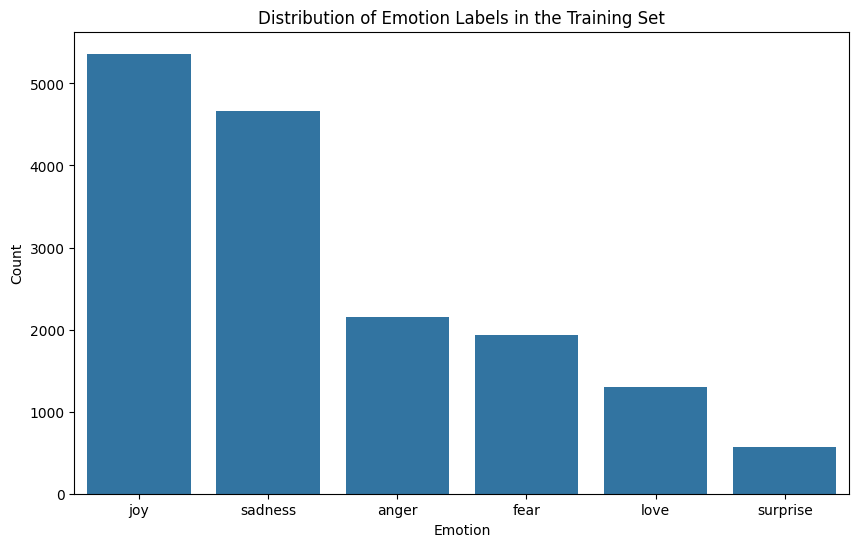

In [62]:
# Plot the distribution of emotion labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='emotion', order=df_train['emotion'].value_counts().index)
plt.title('Distribution of Emotion Labels in the Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

So here the most common is joy and least sentences are of surprise

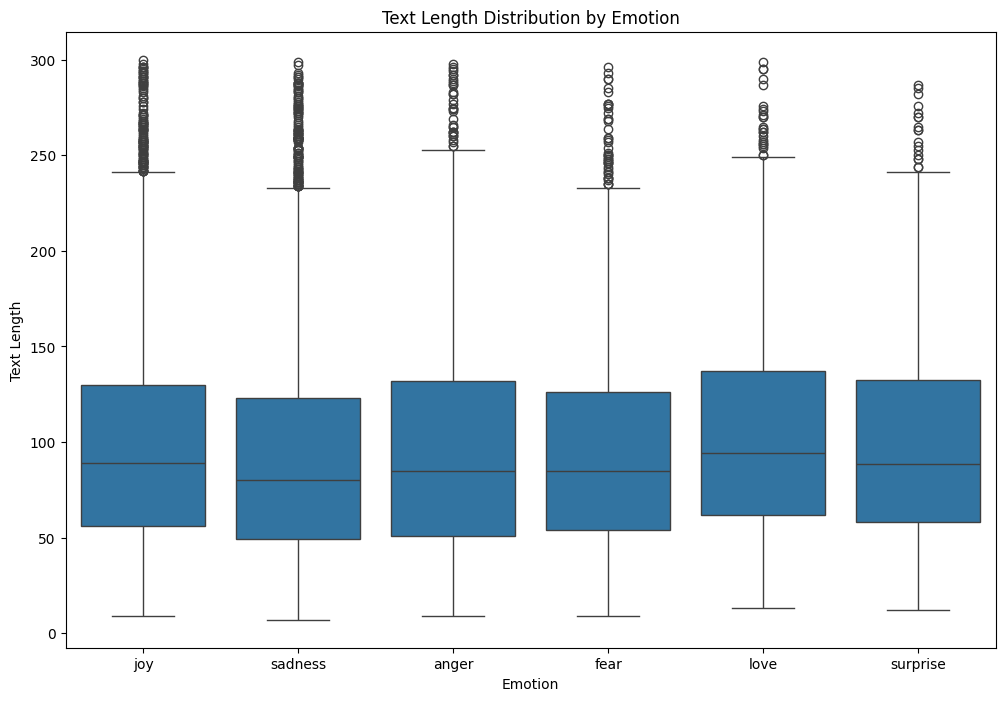

In [63]:
# Calculate text lengths
df_train['text_length'] = df_train['text'].apply(len)

# Plot text length distribution by emotion
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, x='emotion', y='text_length', order=df_train['emotion'].value_counts().index)
plt.title('Text Length Distribution by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.show()


Text length doesnt influence the emotion

In [64]:
# Display sample texts for each emotion
for emotion in df_train['emotion'].unique():
    print(f"\nSamples for emotion: {emotion}")
    print(df_train[df_train['emotion'] == emotion]['text'].head(), "\n")



Samples for emotion: sadness
0                               i didnt feel humiliated
1     i can go from feeling so hopeless to so damned...
5     ive been feeling a little burdened lately wasn...
10    i feel like i have to make the suffering i m s...
13                   i feel low energy i m just thirsty
Name: text, dtype: object 


Samples for emotion: anger
2      im grabbing a minute to post i feel greedy wrong
4                                  i am feeling grouchy
12    i think it s the easiest time of year to feel ...
20    i feel irritated and rejected without anyone d...
24    i already feel like i fucked up though because...
Name: text, dtype: object 


Samples for emotion: love
3     i am ever feeling nostalgic about the fireplac...
9                                   i feel romantic too
47    i can t let go of that sad feeling that i want...
61    i ate i could feel a gentle tingle throughout ...
68    i suppose my own truth needs to be shared i ha...
Name: text, dtype: 

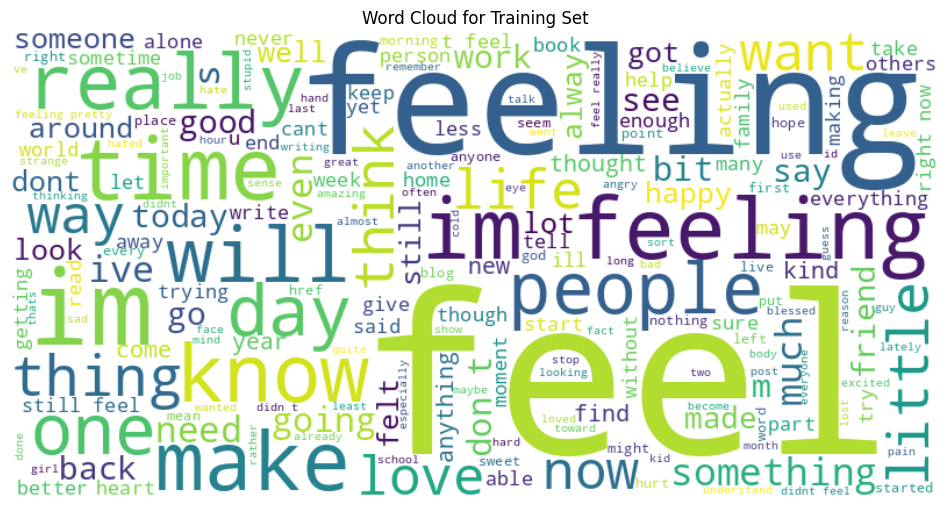

In [65]:
from wordcloud import WordCloud

# Combine all text into a single string
text = ' '.join(df_train['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Training Set')
plt.show()


most common words are feel, feeling, know, will, think, make, really, thing , way etc.

In [66]:
# Display the unique emotions in the training set
unique_emotions = df_train['emotion'].unique()
print("\nUnique emotions in the training set:")
print(unique_emotions)



Unique emotions in the training set:
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


In [67]:
# Display the distribution of emotions in the training set
emotion_counts = df_train['emotion'].value_counts()
print("\nDistribution of emotions in the training set:")
print(emotion_counts)


Distribution of emotions in the training set:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [68]:
# Display sample texts for each emotion
for emotion in unique_emotions:
    print(f"\nSamples for emotion: {emotion}")
    print(df_train[df_train['emotion'] == emotion]['text'].head(), "\n")



Samples for emotion: sadness
0                               i didnt feel humiliated
1     i can go from feeling so hopeless to so damned...
5     ive been feeling a little burdened lately wasn...
10    i feel like i have to make the suffering i m s...
13                   i feel low energy i m just thirsty
Name: text, dtype: object 


Samples for emotion: anger
2      im grabbing a minute to post i feel greedy wrong
4                                  i am feeling grouchy
12    i think it s the easiest time of year to feel ...
20    i feel irritated and rejected without anyone d...
24    i already feel like i fucked up though because...
Name: text, dtype: object 


Samples for emotion: love
3     i am ever feeling nostalgic about the fireplac...
9                                   i feel romantic too
47    i can t let go of that sad feeling that i want...
61    i ate i could feel a gentle tingle throughout ...
68    i suppose my own truth needs to be shared i ha...
Name: text, dtype: 

In [69]:
!pip install nltk
# Install necessary libraries
!pip install datasets nltk wordcloud seaborn
import nltk
from nltk.tokenize import word_tokenize
# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [70]:
# Tokenize the text data
df_train['tokens'] = df_train['text'].apply(word_tokenize)

# Display a few rows to verify the tokenization
print(df_train[['text', 'tokens', 'emotion']].head())


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                              tokens  emotion  
0                       [i, didnt, feel, humiliated]  sadness  
1  [i, can, go, from, feeling, so, hopeless, to, ...  sadness  
2  [im, grabbing, a, minute, to, post, i, feel, g...    anger  
3  [i, am, ever, feeling, nostalgic, about, the, ...     love  
4                          [i, am, feeling, grouchy]    anger  
